# Lettuce Data analysis
In this notebook, we are going to perform an analysis of a data set originally provided in a csv file, so we can understand the main behavior, allowing us to use it in order to create our SOW (Scope of Work) document as the project definition statement.

In [2]:
import pandas as pd

df = pd.read_csv('files/lettuce_dataset.csv')
df

,Plant_ID,Date,Temperature (C),Humidity (%),TDS Value (ppm),pH Level,Growth Days
0,1,8/3/2023,33.4,53,582,6.4,1
1,1,8/4/2023,33.5,53,451,6.1,2
2,1,8/5/2023,33.4,59,678,6.4,3
3,1,8/6/2023,33.4,68,420,6.4,4
4,1,8/7/2023,33.4,74,637,6.5,5
...,...,...,...,...,...,...,...
3164,70,9/13/2023,19.4,72,475,6.1,42
3165,70,9/14/2023,22.5,80,668,6.7,43
3166,70,9/15/2023,22.5,62,476,6.6,44
3167,70,9/16/2023,24.6,79,621,6.0,45


The first thing we have to do is obtain the data metrics.

In [7]:
df.describe()

,Plant_ID,Temperature (C),Humidity (%),TDS Value (ppm),pH Level,Growth Days
count,3169.000000,3169.000000,3169.000000,3169.000000,3169.000000,3169.000000
mean,35.441780,28.142222,64.873462,598.045440,6.399211,23.140107
std,20.243433,4.670521,8.988985,115.713047,0.234418,13.075415
min,1.000000,18.000000,50.000000,400.000000,6.000000,1.000000
25%,18.000000,23.600000,57.000000,498.000000,6.200000,12.000000
50%,35.000000,30.200000,65.000000,593.000000,6.400000,23.000000
75%,53.000000,31.500000,73.000000,699.000000,6.600000,34.000000
max,70.000000,33.500000,80.000000,800.000000,6.800000,48.000000


In [11]:
df_cor=df.drop(columns=['Growth Days','Date'])
df_cor.corr() #Showing the correlation between numerical variables

,Plant_ID,Temperature (C),Humidity (%),TDS Value (ppm),pH Level
Plant_ID,1.000000,-0.670891,-0.031960,0.011703,-0.014827
Temperature (C),-0.670891,1.000000,0.028158,-0.011797,0.014120
Humidity (%),-0.031960,0.028158,1.000000,-0.006148,0.017195
TDS Value (ppm),0.011703,-0.011797,-0.006148,1.000000,-0.014981
pH Level,-0.014827,0.014120,0.017195,-0.014981,1.000000


We may want to see in a more expresive way the correlation between the dataset variables. In order to visualize correlation we can use seaborn as follows:

<Axes: >

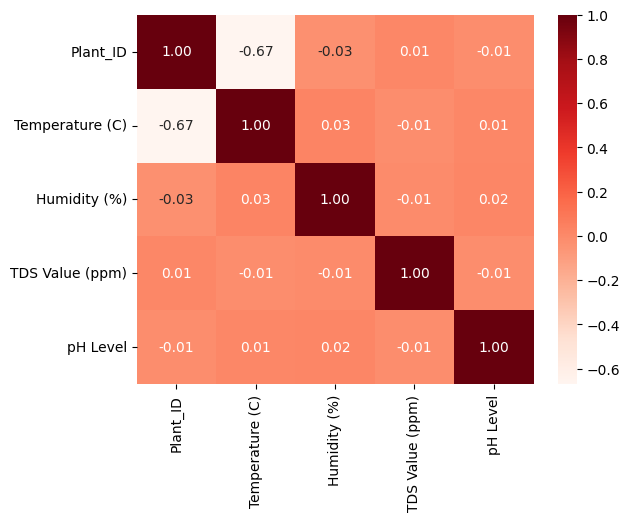

In [16]:
import seaborn as sns
sns.heatmap(df_cor.corr(),annot=True,cmap="Reds",fmt=".2f")

As we can notice, there is no relevant correlation between numerical variables.

In [21]:
#Converting from celsius to fahrenheit:
df['Temperature Fahrenheit (F)']=df['Temperature (C)'].apply(lambda x: (x*(9/5)+32))
#Adding a growth weeks column
df['Growth weeks']=df['Growth Days'].apply(lambda x: x//7)
df

,Plant_ID,Date,Temperature (C),Humidity (%),TDS Value (ppm),pH Level,Growth Days,Temperature Fahrenheit (F),Growth weeks
0,1,8/3/2023,33.4,53,582,6.4,1,92.12,0
1,1,8/4/2023,33.5,53,451,6.1,2,92.30,0
2,1,8/5/2023,33.4,59,678,6.4,3,92.12,0
3,1,8/6/2023,33.4,68,420,6.4,4,92.12,0
4,1,8/7/2023,33.4,74,637,6.5,5,92.12,0
...,...,...,...,...,...,...,...,...,...
3164,70,9/13/2023,19.4,72,475,6.1,42,66.92,6
3165,70,9/14/2023,22.5,80,668,6.7,43,72.50,6
3166,70,9/15/2023,22.5,62,476,6.6,44,72.50,6
3167,70,9/16/2023,24.6,79,621,6.0,45,76.28,6
